In [151]:
install.packages("pROC")
install.packages("vctrs")
install.packages("caret")
install.packages("nnet")
install.packages("cowplot")
install.packages("ggplot2")
install.packages("MASS")


The downloaded binary packages are in
	/var/folders/91/4c3th19d31j6hvx23r6bb5b00000gn/T//RtmpGmmtVP/downloaded_packages

The downloaded binary packages are in
	/var/folders/91/4c3th19d31j6hvx23r6bb5b00000gn/T//RtmpGmmtVP/downloaded_packages

The downloaded binary packages are in
	/var/folders/91/4c3th19d31j6hvx23r6bb5b00000gn/T//RtmpGmmtVP/downloaded_packages

The downloaded binary packages are in
	/var/folders/91/4c3th19d31j6hvx23r6bb5b00000gn/T//RtmpGmmtVP/downloaded_packages

The downloaded binary packages are in
	/var/folders/91/4c3th19d31j6hvx23r6bb5b00000gn/T//RtmpGmmtVP/downloaded_packages

The downloaded binary packages are in
	/var/folders/91/4c3th19d31j6hvx23r6bb5b00000gn/T//RtmpGmmtVP/downloaded_packages


Warning message:
"package 'MASS' is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages"


In [2]:
all_table <- read.csv("/Users/User/Documents/GitHub/DesktopDownthrottlingExperiment/post_experiment/Regression/regression_tables/fieldwork/subjective_and_objective_table.csv")

# Visualise MOS distribution

In [2]:
install.packages("ordinal")


The downloaded binary packages are in
	/var/folders/91/4c3th19d31j6hvx23r6bb5b00000gn/T//RtmpY5lVhS/downloaded_packages


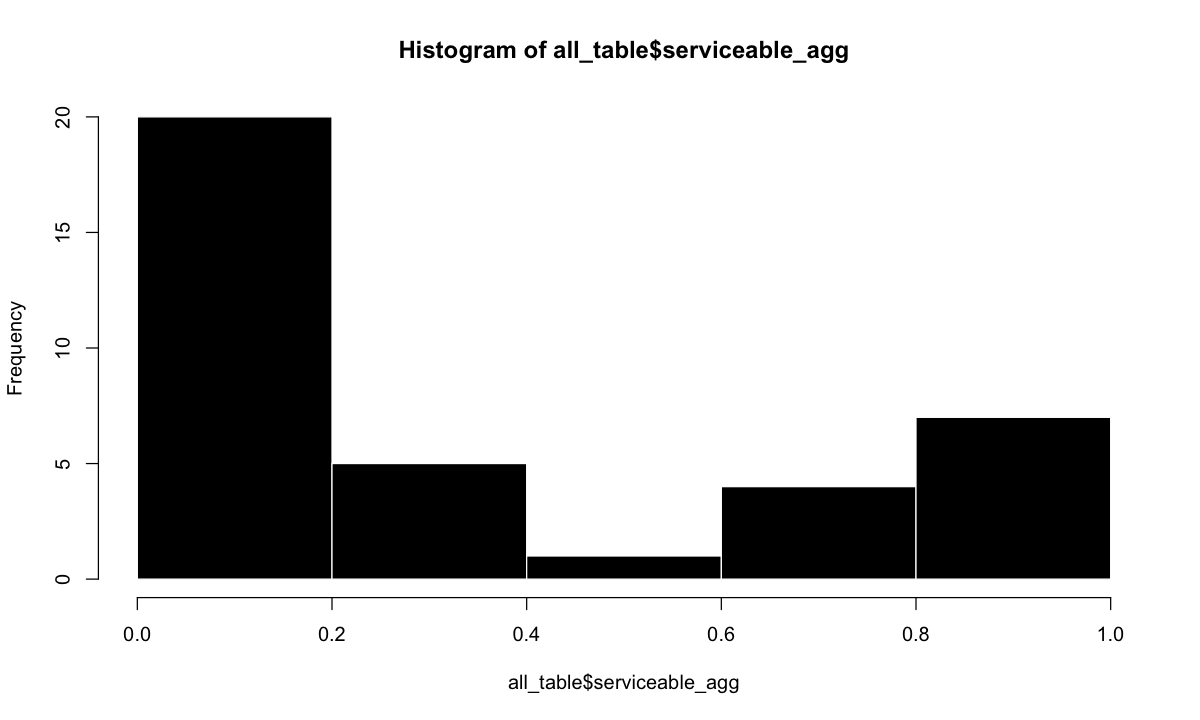

In [5]:
options(repr.plot.width = 10, repr.plot.height = 6)
#plot the target variable
par(bg = "white")  # set background color to white
hist(all_table$serviceable_agg,
     col = "black",
     border = "white")

## add a new ordinal variable that represents the levels of serviceable agg

In [6]:
library(ordinal)
all_table$rounded_serviceable_agg <- round(as.numeric(all_table$serviceable_agg), digits = 2)
all_table$ordered <- factor(all_table$rounded_serviceable_agg, 
levels =c(0.00,0.33, 0.5, 0.67, 1.00), 
ordered = TRUE)

### fit a big model with all vars to this ordinal var 

In [7]:
fit <- clm(ordered ~ avg_up_ellen + avg_down_ellen + avg_rtt_ellen + avg_ellen_jitter + avg_pl_ellen
    + avg_up_aadya + avg_down_aadya + avg_rtt_aadya + avg_jitter_aadya + avg_pl_aadya 
    + sd_up_ellen + sd_down_ellen + sd_rtt_ellen + sd_jitter_ellen + sd_pl_ellen 
    + sd_up_aadya + sd_down_aadya + sd_rtt_aadya + sd_jitter_aadya + sd_pl_aadya,
    #+ avg_down_google + avg_up_google + avg_rtt_google + sd_down_google + sd_up_google + sd_rtt_google, 
    data = all_table)
summary(fit)

formula: 
ordered ~ avg_up_ellen + avg_down_ellen + avg_rtt_ellen + avg_ellen_jitter + avg_pl_ellen + avg_up_aadya + avg_down_aadya + avg_rtt_aadya + avg_jitter_aadya + avg_pl_aadya + sd_up_ellen + sd_down_ellen + sd_rtt_ellen + sd_jitter_ellen + sd_pl_ellen + sd_up_aadya + sd_down_aadya + sd_rtt_aadya + sd_jitter_aadya + sd_pl_aadya
data:    all_table

 link  threshold nobs logLik AIC    niter max.grad cond.H 
 logit flexible  37   -31.20 110.41 10(2) 3.13e-09 8.2e+06

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)  
avg_up_ellen     -0.16947    0.11935  -1.420   0.1556  
avg_down_ellen    0.06252    0.05823   1.074   0.2829  
avg_rtt_ellen    -0.20172    0.16688  -1.209   0.2267  
avg_ellen_jitter -0.13739    0.19852  -0.692   0.4889  
avg_pl_ellen      0.01536    0.20605   0.075   0.9406  
avg_up_aadya      0.12575    0.09925   1.267   0.2052  
avg_down_aadya   -0.08124    0.06953  -1.168   0.2426  
avg_rtt_aadya     0.05451    0.20134   0.271   0.7866  
avg_jit

### perform and plot the predictions

[1] 110.4062

[1] 149.0682

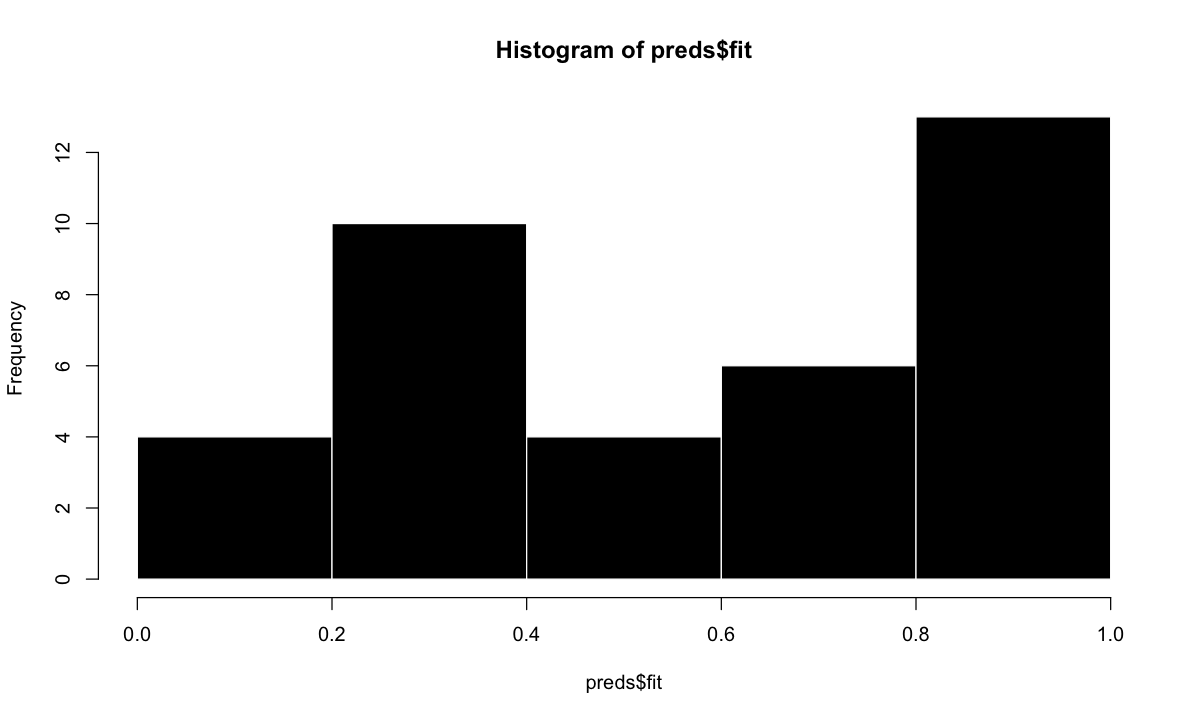

In [8]:
preds <- predict(fit, all_table)
AIC(fit)
BIC(fit)
options(repr.plot.width = 10, repr.plot.height = 6)
#plot the target variable
par(bg = "white")  # set background color to white
hist(preds$fit,
     col = "black",
     border = "white")


In [9]:
predicted_classes <- ifelse(preds$fit > 0.8, "1", "0")  # Example for binary outcome
table(predicted_classes, all_table$ordered)

                 
predicted_classes  0 0.33 0.5 0.67  1
                0 10    5   1    4  4
                1 10    0   0    0  3

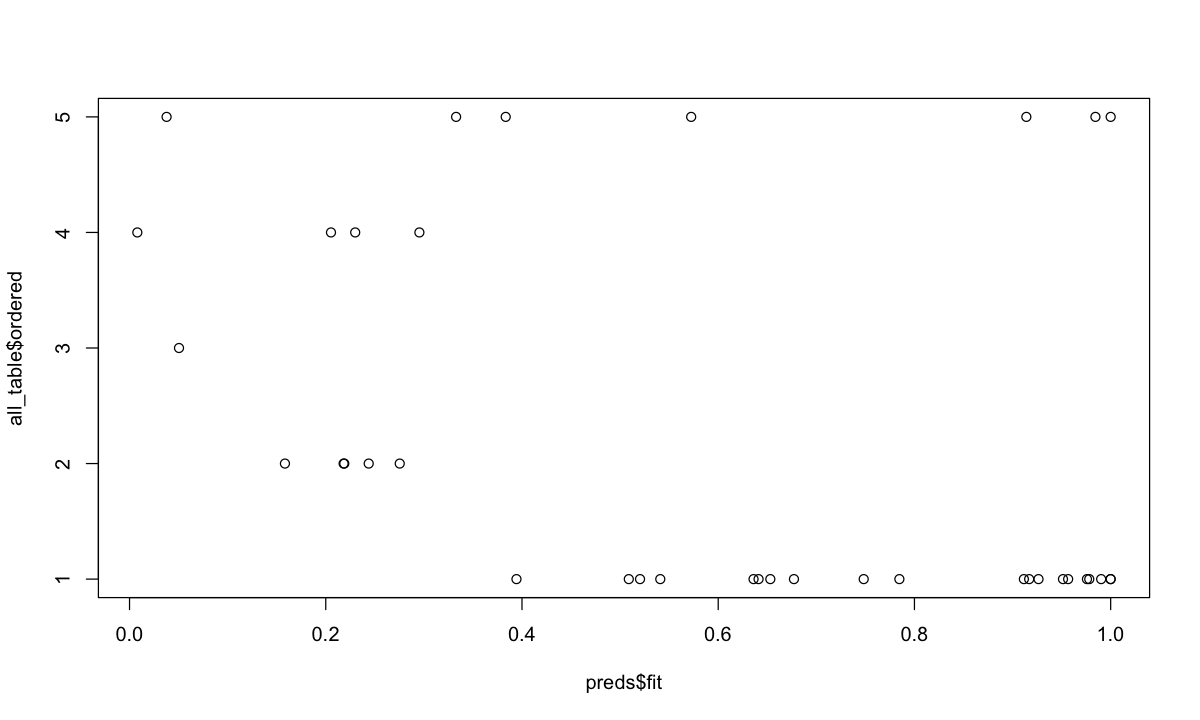

In [10]:
par(bg = "white")
preds <- predict(fit, all_table)
plot(preds$fit, all_table$ordered)

# Penalised regression 
### AIC

Start:  AIC=110.41
ordered ~ avg_up_ellen + avg_down_ellen + avg_rtt_ellen + avg_ellen_jitter + 
    avg_pl_ellen + avg_up_aadya + avg_down_aadya + avg_rtt_aadya + 
    avg_jitter_aadya + avg_pl_aadya + sd_up_ellen + sd_down_ellen + 
    sd_rtt_ellen + sd_jitter_ellen + sd_pl_ellen + sd_up_aadya + 
    sd_down_aadya + sd_rtt_aadya + sd_jitter_aadya + sd_pl_aadya

                   Df    AIC
- avg_pl_ellen      1 108.41
- avg_rtt_aadya     1 108.48
- sd_jitter_aadya   1 108.53
- sd_pl_ellen       1 108.56
- avg_jitter_aadya  1 108.64
- sd_rtt_aadya      1 108.70
- avg_ellen_jitter  1 108.90
- sd_jitter_ellen   1 108.97
- avg_pl_aadya      1 109.28
- sd_rtt_ellen      1 109.46
- avg_down_ellen    1 109.61
- avg_down_aadya    1 109.93
- avg_rtt_ellen     1 109.94
- sd_down_aadya     1 110.05
- sd_pl_aadya       1 110.07
- sd_up_ellen       1 110.11
<none>                110.41
- avg_up_aadya      1 110.48
- sd_down_ellen     1 110.76
- avg_up_ellen      1 111.18
- sd_up_aadya       1 112

formula: ordered ~ avg_down_ellen + avg_rtt_ellen + avg_up_aadya
data:    all_table

 link  threshold nobs logLik AIC   niter max.grad cond.H 
 logit flexible  37   -35.91 85.82 7(2)  1.42e-12 5.4e+05

Coefficients:
               Estimate Std. Error z value Pr(>|z|)   
avg_down_ellen  0.02965    0.01936   1.531  0.12577   
avg_rtt_ellen  -0.11109    0.07299  -1.522  0.12801   
avg_up_aadya    0.11053    0.03802   2.907  0.00365 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Threshold coefficients:
         Estimate Std. Error z value
0|0.33    -0.4758     2.2469  -0.212
0.33|0.5   0.4156     2.2296   0.186
0.5|0.67   0.6101     2.2244   0.274
0.67|1     1.5568     2.2536   0.691

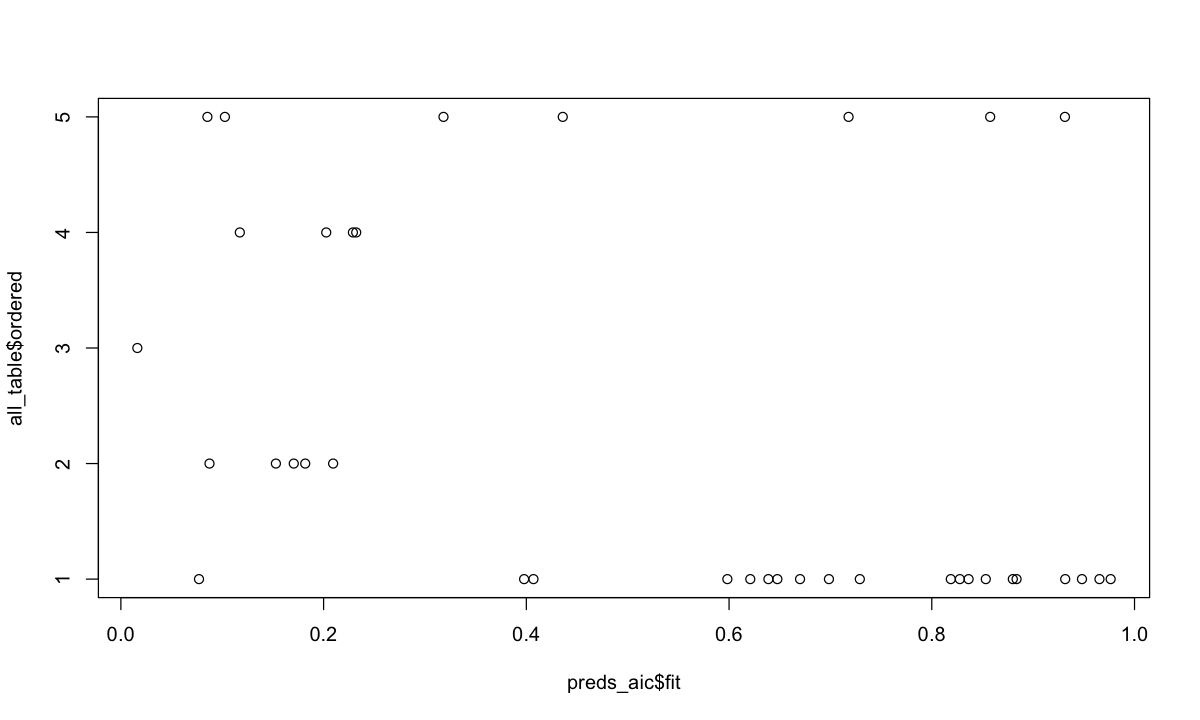

In [11]:
fit_aic <- step(fit) #stepwise regression to optimse a linear model
summary(fit_aic)
par(bg = "white")
preds_aic <-predict(fit_aic, all_table)
plot(preds_aic$fit, all_table$ordered)

### BIC

Start:  AIC=149.07
ordered ~ avg_up_ellen + avg_down_ellen + avg_rtt_ellen + avg_ellen_jitter + 
    avg_pl_ellen + avg_up_aadya + avg_down_aadya + avg_rtt_aadya + 
    avg_jitter_aadya + avg_pl_aadya + sd_up_ellen + sd_down_ellen + 
    sd_rtt_ellen + sd_jitter_ellen + sd_pl_ellen + sd_up_aadya + 
    sd_down_aadya + sd_rtt_aadya + sd_jitter_aadya + sd_pl_aadya

                   Df    AIC
- avg_pl_ellen      1 145.46
- avg_rtt_aadya     1 145.53
- sd_jitter_aadya   1 145.58
- sd_pl_ellen       1 145.62
- avg_jitter_aadya  1 145.69
- sd_rtt_aadya      1 145.76
- avg_ellen_jitter  1 145.95
- sd_jitter_ellen   1 146.02
- avg_pl_aadya      1 146.33
- sd_rtt_ellen      1 146.51
- avg_down_ellen    1 146.67
- avg_down_aadya    1 146.98
- avg_rtt_ellen     1 146.99
- sd_down_aadya     1 147.10
- sd_pl_aadya       1 147.12
- sd_up_ellen       1 147.16
- avg_up_aadya      1 147.53
- sd_down_ellen     1 147.81
- avg_up_ellen      1 148.23
<none>                149.07
- sd_up_aadya       1 149

formula: ordered ~ avg_up_aadya
data:    all_table

 link  threshold nobs logLik AIC   niter max.grad cond.H 
 logit flexible  37   -38.29 86.58 6(2)  3.23e-10 4.2e+03

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
avg_up_aadya  0.12350    0.03504   3.525 0.000424 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Threshold coefficients:
         Estimate Std. Error z value
0|0.33     1.7134     0.5781   2.964
0.33|0.5   2.5040     0.6534   3.832
0.5|0.67   2.6832     0.6730   3.987
0.67|1     3.5967     0.8080   4.451

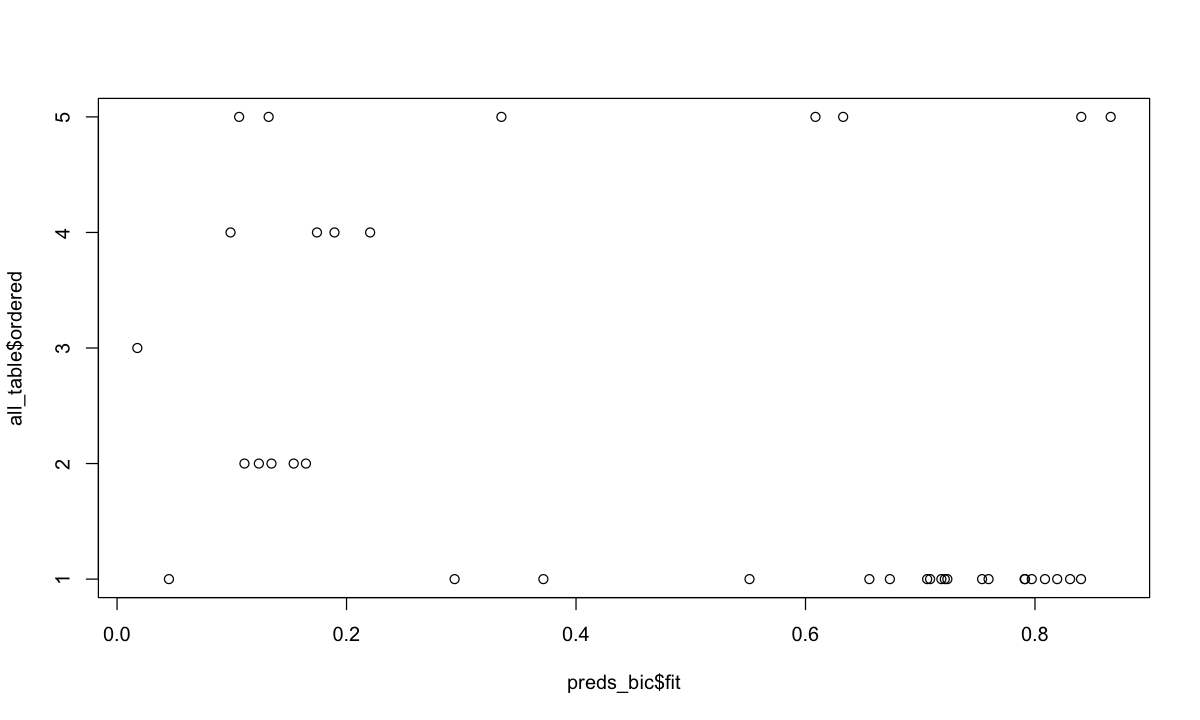

In [12]:
fit_bic <- step(fit, k = log(length(all_table$ordered)))
summary(fit_bic)
par(bg = "white")
par(bg = "white")
preds_bic <-predict(fit_bic, all_table)
plot(preds_bic$fit, all_table$ordered)

## regression with webRTC vars

In [3]:
subjective <- read.csv("/Users/User/Documents/GitHub/DesktopDownthrottlingExperiment/post_experiment/Regression/regression_tables/fieldwork/subjective_table.csv")

In [19]:
subjective <- read.csv("/Users/User/Documents/GitHub/DesktopDownthrottlingExperiment/post_experiment/Regression/regression_tables/fieldwork/subjective_table.csv")
web_stats <- read.csv("/Users/User/Documents/GitHub/DesktopDownthrottlingExperiment/post_experiment/Regression_2_(web_to_serviceable)/independent_vars_tables/fieldwork_independent_vars_table.csv")
#rename the id col in subjective to perform a merge
names(subjective)[names(subjective) == "identifier"] <- "ID"
#add the ordinal var to web_stats
web_stats <- merge(web_stats, subjective[, c("ID", "serviceable_agg")], by = "ID", all.x = TRUE)
unique(subjective$serviceable_agg)

[1] 0 1

### fit a big regression
vars removed : 0 columns 
linearly dependent cols: frame heights removed 

In [20]:
fit_rtc <- glm(serviceable_agg ~ IT01V_packetsRecieved_ellen + IT01V_packetsRecieved_aadya + IT01V_packetsLost_ellen + IT01V_packetsLost_aadya + IT01V_frameWidth_ellen + IT01V_frameWidth_aadya 
+ IT01V_totalFreezesDuration_ellen + IT01V_totalFreezesDuration_aadya + IT01V_framesPerSecond_ellen + IT01V_framesPerSecond_aadya + IT01V_bytesReceived_in_bits_s_ellen + IT01V_bytesReceived_in_bits_s_aadya 
+ IT01V_totalProcessingDelay_ellen + IT01V_totalProcessingDelay_aadya + IT01V_jitter_ellen + IT01V_jitter_aadya + IT01V_jitterBufferDelay_emissions_ellen + IT01V_jitterBufferDelay_emissions_aadya 
+ IT01A_bytesReceived_in_bits_s_ellen + IT01A_bytesReceived_in_bits_s_aadya + IT01A_jitterBufferDelay_emissions_ellen + IT01A_jitterBufferDelay_emissions_aadya + OT01V_packetsSent_s_ellen 
+ OT01V_packetsSent_s_aadya + OT01V_bytesSent_in_bits_s_ellen + OT01V_bytesSent_in_bits_s_aadya + OT01V_frameWidth_ellen + OT01V_frameWidth_aadya + OT01V_framesPerSecond_ellen + OT01V_framesPerSecond_aadya 
+ OT01V_totalPacketSendDelay_ellen + OT01V_totalPacketSendDelay_aadya + OT01V_totalPacketSendDelay_packetsSent_in_ms_ellen + OT01V_totalPacketSendDelay_packetsSent_in_ms_aadya + RIV_roundTripTime_ellen 
+ RIV_roundTripTime_aadya + RIV_fractionLost_ellen + RIV_fractionLost_aadya + RIA_fractionLost_ellen + RIA_fractionLost_aadya + RIA_roundTripTime_ellen + RIA_roundTripTime_aadya + ROA_roundTripTime_ellen 
+ ROA_roundTripTime_aadya + AP_totalPlayoutDelay_ellen + AP_totalPlayoutDelay_aadya

, data = web_stats, family = binomial())
summary(fit_rtc)

ERROR: Error in family$linkfun(mustart): Argument mu must be a nonempty numeric vector


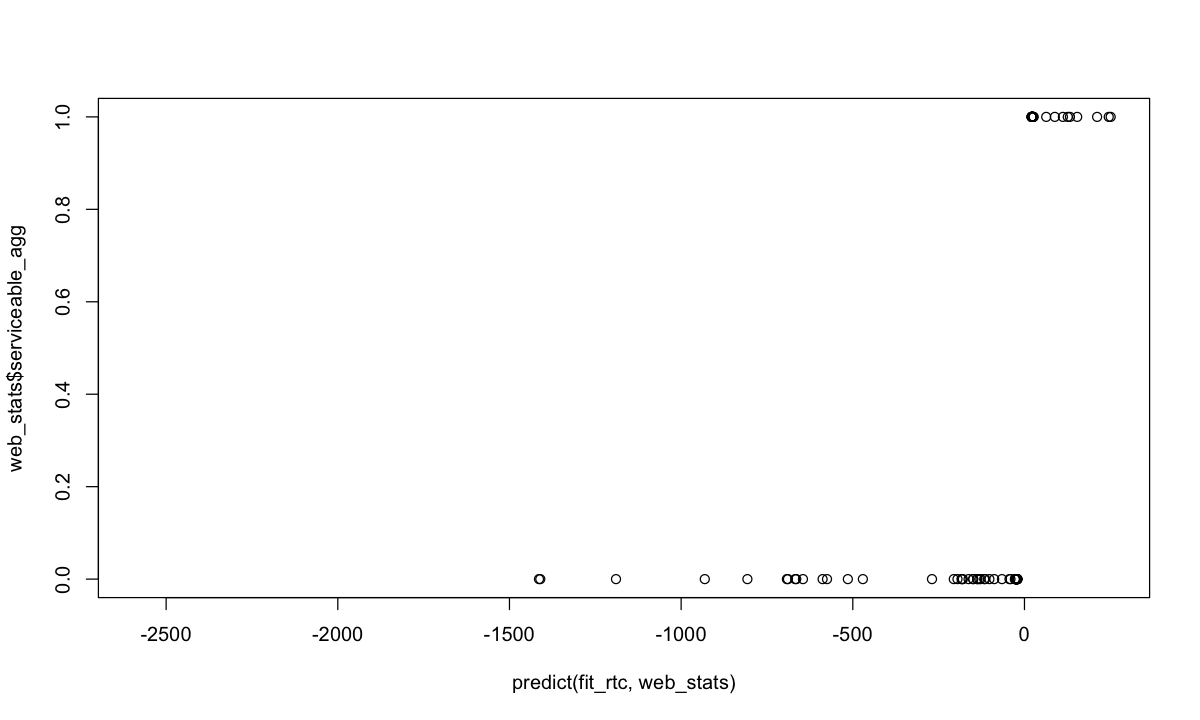

In [16]:
par(bg = "white")
plot(predict(fit_rtc, web_stats), web_stats$serviceable_agg)

In [26]:
install.packages("glmnet")
library(glmnet)
library(pROC)
source("wrapper.R")
my.pred.stats <- function(prob, target)
{
  classes = levels(target)
  
  # Convert probabilities to best guesses at classes
  pred = factor(prob > 1/2, c(F,T), classes)
  
  cat("---------------------------------------------------------------------------\n")
  cat("Performance statistics:\n")
  cat("\n")
  cat("Confusion matrix:\n\n")
  T = table(pred,target)
  print(T)
  cat("\n")
  cat("Classification accuracy =", mean(pred==target), "\n")
  cat("Sensitivity             =", T[2,2]/(T[1,2]+T[2,2]), "\n")
  cat("Specificity             =", T[1,1]/(T[1,1]+T[2,1]), "\n")
  roc.obj = roc(response=as.vector(as.numeric(target))-1, as.vector(prob), quiet=TRUE)
  cat("Area-under-curve        =", roc.obj$auc, "\n")
  
  # Prob is probability of success, so if the target is not a success, flip the probability
  # to get probability of failure
  prob[target==classes[1]] = 1 - prob[target==classes[1]]
  # Also make sure we never get exactly zero or one for probabilities due to numerical rounding
  prob = (prob+1e-10)/(1+2e-10)
  
  cat("Logarithmic loss        =", -sum(log(prob)), "\n")
  cat("\n")
  
  plot(roc.obj)
  
  cat("---------------------------------------------------------------------------\n")
}


The downloaded binary packages are in
	/var/folders/91/4c3th19d31j6hvx23r6bb5b00000gn/T//RtmpyGic5f/downloaded_packages


Type 'citation("pROC")' for a citation.


Attaching package: 'pROC'


The following objects are masked from 'package:stats':

    cov, smooth, var




In [27]:
names(web_stats)

[1] "ID"                                                
 [2] "IT01V_packetsRecieved_ellen"                       
 [3] "IT01V_packetsRecieved_aadya"                       
 [4] "IT01V_packetsLost_ellen"                           
 [5] "IT01V_packetsLost_aadya"                           
 [6] "IT01V_frameWidth_ellen"                            
 [7] "IT01V_frameWidth_aadya"                            
 [8] "IT01V_frameHeight_ellen"                           
 [9] "IT01V_frameHeight_aadya"                           
[10] "IT01V_totalFreezesDuration_ellen"                  
[11] "IT01V_totalFreezesDuration_aadya"                  
[12] "IT01V_framesPerSecond_ellen"                       
[13] "IT01V_framesPerSecond_aadya"                       
[14] "IT01V_bytesReceived_in_bits_s_ellen"               
[15] "IT01V_bytesReceived_in_bits_s_aadya"               
[16] "IT01V_totalProcessingDelay_ellen"                  
[17] "IT01V_totalProcessingDelay_aadya"                  
[18] "IT01V_jitter_ellen"                                
[19] "IT01V_jitter_aadya"                                
[20] "IT01V_jitterBufferDelay_emissions_ellen"           
[21] "IT01V_jitterBufferDelay_emissions_aadya"           
[22] "IT01A_bytesReceived_in_bits_s_ellen"               
[23] "IT01A_bytesReceived_in_bits_s_aadya"               
[24] "IT01A_jitterBufferDelay_emissions_ellen"           
[25] "IT01A_jitterBufferDelay_emissions_aadya"           
[26] "OT01V_packetsSent_s_ellen"                         
[27] "OT01V_packetsSent_s_aadya"                         
[28] "OT01V_bytesSent_in_bits_s_ellen"                   
[29] "OT01V_bytesSent_in_bits_s_aadya"                   
[30] "OT01V_frameWidth_ellen"                            
[31] "OT01V_frameWidth_aadya"                            
[32] "OT01V_framesPerSecond_ellen"                       
[33] "OT01V_framesPerSecond_aadya"                       
[34] "OT01V_totalPacketSendDelay_ellen"                  
[35] "OT01V_totalPacketSendDelay_aadya"                  
[36] "OT01V_totalPacketSendDelay_packetsSent_in_ms_ellen"
[37] "OT01V_totalPacketSendDelay_packetsSent_in_ms_aadya"
[38] "RIV_roundTripTime_ellen"                           
[39] "RIV_roundTripTime_aadya"                           
[40] "RIV_fractionLost_ellen"                            
[41] "RIV_fractionLost_aadya"                            
[42] "RIA_fractionLost_ellen"                            
[43] "RIA_fractionLost_aadya"                            
[44] "RIA_roundTripTime_ellen"                           
[45] "RIA_roundTripTime_aadya"                           
[46] "ROA_roundTripTime_ellen"                           
[47] "ROA_roundTripTime_aadya"                           
[48] "AP_totalPlayoutDelay_ellen"                        
[49] "AP_totalPlayoutDelay_aadya"                        
[50] "serviceable_agg"

In [28]:
# Clean the data
web_stats_clean <- na.omit(web_stats)

# Set seed for reproducibility
set.seed(123)

# Calculate the row indices for the 70% training set
train_indices <- sample(1:nrow(web_stats_clean), size = 0.7 * nrow(web_stats_clean))

# Split the data into training and testing sets
train_data <- web_stats_clean[train_indices, ]
test_data <- web_stats_clean[-train_indices, ]

# Create the response variable from the training data
response <- factor(train_data$serviceable_agg, levels = c(0, 1))

# Create predictors matrix for the training data
train_predictors <- as.matrix(train_data[, c('IT01V_packetsRecieved_ellen','IT01V_packetsRecieved_aadya','IT01V_packetsLost_ellen','IT01V_packetsLost_aadya',
'IT01V_frameWidth_ellen','IT01V_frameWidth_aadya','IT01V_frameHeight_ellen','IT01V_frameHeight_aadya','IT01V_totalFreezesDuration_ellen','IT01V_totalFreezesDuration_aadya',
'IT01V_framesPerSecond_ellen','IT01V_framesPerSecond_aadya','IT01V_bytesReceived_in_bits_s_ellen','IT01V_bytesReceived_in_bits_s_aadya',
'IT01V_totalProcessingDelay_ellen','IT01V_totalProcessingDelay_aadya','IT01V_jitter_ellen','IT01V_jitter_aadya','IT01V_jitterBufferDelay_emissions_ellen',
'IT01V_jitterBufferDelay_emissions_aadya','IT01A_bytesReceived_in_bits_s_ellen','IT01A_bytesReceived_in_bits_s_aadya','IT01A_jitterBufferDelay_emissions_ellen',
'IT01A_jitterBufferDelay_emissions_aadya','OT01V_packetsSent_s_ellen','OT01V_packetsSent_s_aadya','OT01V_bytesSent_in_bits_s_ellen','OT01V_bytesSent_in_bits_s_aadya',
'OT01V_frameWidth_ellen','OT01V_frameWidth_aadya','OT01V_framesPerSecond_ellen','OT01V_framesPerSecond_aadya','OT01V_totalPacketSendDelay_ellen',
'OT01V_totalPacketSendDelay_aadya','OT01V_totalPacketSendDelay_packetsSent_in_ms_ellen','OT01V_totalPacketSendDelay_packetsSent_in_ms_aadya',
'RIV_roundTripTime_ellen','RIV_roundTripTime_aadya','RIV_fractionLost_ellen','RIV_fractionLost_aadya','RIA_fractionLost_ellen','RIA_fractionLost_aadya',
'RIA_roundTripTime_ellen','RIA_roundTripTime_aadya','ROA_roundTripTime_ellen','ROA_roundTripTime_aadya','AP_totalPlayoutDelay_ellen','AP_totalPlayoutDelay_aadya')])

# Fit the model using the training data
lasso.fit = glmnet.f(response ~ train_predictors, data = train_data, family = "binomial", lambda = 0)


ERROR: Error in if (is.null(np) | (np[2] <= 1)) stop("x should be a matrix with 2 or more columns"): argument is of length zero


In [29]:
# Create the predictors matrix for the test data
test_predictors <- as.matrix(test_data[, c('IT01V_packetsRecieved_ellen','IT01V_packetsRecieved_aadya','IT01V_packetsLost_ellen','IT01V_packetsLost_aadya',
'IT01V_frameWidth_ellen','IT01V_frameWidth_aadya','IT01V_frameHeight_ellen','IT01V_frameHeight_aadya','IT01V_totalFreezesDuration_ellen','IT01V_totalFreezesDuration_aadya',
'IT01V_framesPerSecond_ellen','IT01V_framesPerSecond_aadya','IT01V_bytesReceived_in_bits_s_ellen','IT01V_bytesReceived_in_bits_s_aadya',
'IT01V_totalProcessingDelay_ellen','IT01V_totalProcessingDelay_aadya','IT01V_jitter_ellen','IT01V_jitter_aadya','IT01V_jitterBufferDelay_emissions_ellen',
'IT01V_jitterBufferDelay_emissions_aadya','IT01A_bytesReceived_in_bits_s_ellen','IT01A_bytesReceived_in_bits_s_aadya','IT01A_jitterBufferDelay_emissions_ellen',
'IT01A_jitterBufferDelay_emissions_aadya','OT01V_packetsSent_s_ellen','OT01V_packetsSent_s_aadya','OT01V_bytesSent_in_bits_s_ellen','OT01V_bytesSent_in_bits_s_aadya',
'OT01V_frameWidth_ellen','OT01V_frameWidth_aadya','OT01V_framesPerSecond_ellen','OT01V_framesPerSecond_aadya','OT01V_totalPacketSendDelay_ellen',
'OT01V_totalPacketSendDelay_aadya','OT01V_totalPacketSendDelay_packetsSent_in_ms_ellen','OT01V_totalPacketSendDelay_packetsSent_in_ms_aadya',
'RIV_roundTripTime_ellen','RIV_roundTripTime_aadya','RIV_fractionLost_ellen','RIV_fractionLost_aadya','RIA_fractionLost_ellen','RIA_fractionLost_aadya',
'RIA_roundTripTime_ellen','RIA_roundTripTime_aadya','ROA_roundTripTime_ellen','ROA_roundTripTime_aadya','AP_totalPlayoutDelay_ellen','AP_totalPlayoutDelay_aadya')])

# Ensure test_predictors has the correct number of columns
if (ncol(test_predictors) != ncol(train_predictors)) {
  stop("Mismatch in number of columns between test_predictors and train_predictors.")
}

# Assuming lasso_fit has been trained
prob <- predict(lasso.fit, newx = test_predictors, type = "response")

# Check if prob is NULL or has no values
if (is.null(prob) || length(prob) == 0) {
  stop("The predicted probabilities are NULL or empty.")
}

# Ensure 'prob' is numeric
if (!is.numeric(prob)) {
  stop("The predicted probabilities are not numeric.")
}

# Convert probabilities to binary classifications
predicted_class <- ifelse(prob > 0.5, levels(web_stats_clean$serviceable_agg)[2], levels(web_stats_clean$serviceable_agg)[1])

# Check if predicted_class is NULL or has length zero
if (is.null(predicted_class) || length(predicted_class) == 0) {
  stop("predicted_class is NULL or has length zero.")
}

predicted_class <- factor(predicted_class, levels = levels(web_stats_clean$serviceable_agg))

# Calculate performance metrics
my.pred.stats(predicted_class, test_data$serviceable_agg)  # Use test_data instead of web_stats_clean


ERROR: Error in eval(expr, envir, enclos): object 'lasso.fit' not found


In [25]:
test_predictors <- as.matrix(test_data[, c('IT01V_packetsRecieved_ellen','IT01V_packetsRecieved_aadya','IT01V_packetsLost_ellen','IT01V_packetsLost_aadya',
'IT01V_frameWidth_ellen','IT01V_frameWidth_aadya','IT01V_frameHeight_ellen','IT01V_frameHeight_aadya','IT01V_totalFreezesDuration_ellen','IT01V_totalFreezesDuration_aadya',
'IT01V_framesPerSecond_ellen','IT01V_framesPerSecond_aadya','IT01V_bytesReceived_in_bits_s_ellen','IT01V_bytesReceived_in_bits_s_aadya',
'IT01V_totalProcessingDelay_ellen','IT01V_totalProcessingDelay_aadya','IT01V_jitter_ellen','IT01V_jitter_aadya','IT01V_jitterBufferDelay_emissions_ellen',
'IT01V_jitterBufferDelay_emissions_aadya','IT01A_bytesReceived_in_bits_s_ellen','IT01A_bytesReceived_in_bits_s_aadya','IT01A_jitterBufferDelay_emissions_ellen',
'IT01A_jitterBufferDelay_emissions_aadya','OT01V_packetsSent_s_ellen','OT01V_packetsSent_s_aadya','OT01V_bytesSent_in_bits_s_ellen','OT01V_bytesSent_in_bits_s_aadya',
'OT01V_frameWidth_ellen','OT01V_frameWidth_aadya','OT01V_framesPerSecond_ellen','OT01V_framesPerSecond_aadya','OT01V_totalPacketSendDelay_ellen',
'OT01V_totalPacketSendDelay_aadya','OT01V_totalPacketSendDelay_packetsSent_in_ms_ellen','OT01V_totalPacketSendDelay_packetsSent_in_ms_aadya',
'RIV_roundTripTime_ellen','RIV_roundTripTime_aadya','RIV_fractionLost_ellen','RIV_fractionLost_aadya','RIA_fractionLost_ellen','RIA_fractionLost_aadya',
'RIA_roundTripTime_ellen','RIA_roundTripTime_aadya','ROA_roundTripTime_ellen','ROA_roundTripTime_aadya','AP_totalPlayoutDelay_ellen','AP_totalPlayoutDelay_aadya')])

prob <- predict(lasso.fit, newx = test_predictors, type = "response")

if (!is.numeric(prob)) {
  stop("The predicted probabilities are not numeric.")
}

predicted_class <- ifelse(prob > 0.5, levels(web_stats_clean$serviceable_agg)[2], levels(web_stats_clean$serviceable_agg)[1])
predicted_class <- factor(predicted_class, levels = levels(web_stats_clean$serviceable_agg))

# Calculate performance metrics
my.pred.stats(predicted_class, test_data$serviceable_agg)  # Use test_data instead of web_stats_clean



ERROR: Error in h(simpleError(msg, call)): error in evaluating the argument 'x' in selecting a method for function 'as.matrix': object 'test_data' not found


In [38]:
classes <- levels(test_data$serviceable_agg)


In [31]:
lasso_model <- glmnet(predictors, response, alpha = 1)
print(lasso_model)


Call:  glmnet(x = predictors, y = response, alpha = 1) 

   Df  %Dev   Lambda
1   0  0.00 0.197200
2   1  2.93 0.179700
3   1  5.35 0.163800
4   1  7.37 0.149200
5   1  9.04 0.136000
6   3 11.33 0.123900
7   3 13.35 0.112900
8   3 15.02 0.102800
9   5 16.79 0.093710
10  7 18.79 0.085380
11  7 21.37 0.077800
12  8 23.72 0.070890
13  8 25.80 0.064590
14  9 27.87 0.058850
15 10 29.79 0.053620
16 11 31.54 0.048860
17 12 33.04 0.044520
18 13 34.59 0.040560
19 15 35.92 0.036960
20 15 37.09 0.033680
21 16 38.19 0.030680
22 16 39.11 0.027960
23 17 39.94 0.025470
24 18 40.78 0.023210
25 19 41.71 0.021150
26 18 42.59 0.019270
27 19 43.29 0.017560
28 20 43.96 0.016000
29 21 44.59 0.014580
30 21 45.23 0.013280
31 20 45.75 0.012100
32 21 46.18 0.011030
33 21 46.60 0.010050
34 25 46.97 0.009155
35 26 47.33 0.008342
36 27 47.68 0.007601
37 27 47.99 0.006926
38 27 48.25 0.006310
39 27 48.47 0.005750
40 27 48.64 0.005239
41 29 48.82 0.004774
42 30 48.97 0.004349
43 29 49.10 0.003963
44 32 49.21 0.0036

In [24]:
cv_fit <- cv.glmnet(x = test_predictors, y = response, alpha = 1, family = "binomial")
par(bg = "white")
plot(cv_fit)
optimal_lambda <- cv_fit$lambda.min  # The lambda that minimizes the cross-validated error
print(optimal_lambda)
# Fit the final model with the optimal lambda
final_model <- glmnet(x = predictors, y = response, alpha = 1, lambda = optimal_lambda)
coef(final_model)


ERROR: Error in eval(expr, envir, enclos): object 'test_predictors' not found


[1] 0.04885857


47 x 1 sparse Matrix of class "dgCMatrix"
                                                              s0
(Intercept)                                        -1.354194e-01
IT01V_packetsRecieved_ellen                         .           
IT01V_packetsRecieved_aadya                         5.032947e-04
IT01V_packetsLost_ellen                             .           
IT01V_packetsLost_aadya                             6.916337e-03
IT01A_bytesReceived_in_bits_s_ellen                 .           
IT01A_bytesReceived_in_bits_s_aadya                 .           
OT01V_bytesSent_in_bits_s_aadya                     .           
OT01V_bytesSent_in_bits_s_ellen                     .           
OT01V_packetsSent_s_aadya                           .           
OT01V_packetsSent_s_ellen                           .           
IT01V_frameWidth_ellen                              .           
IT01V_frameWidth_aadya                              .           
IT01V_frameHeight_ellen                         

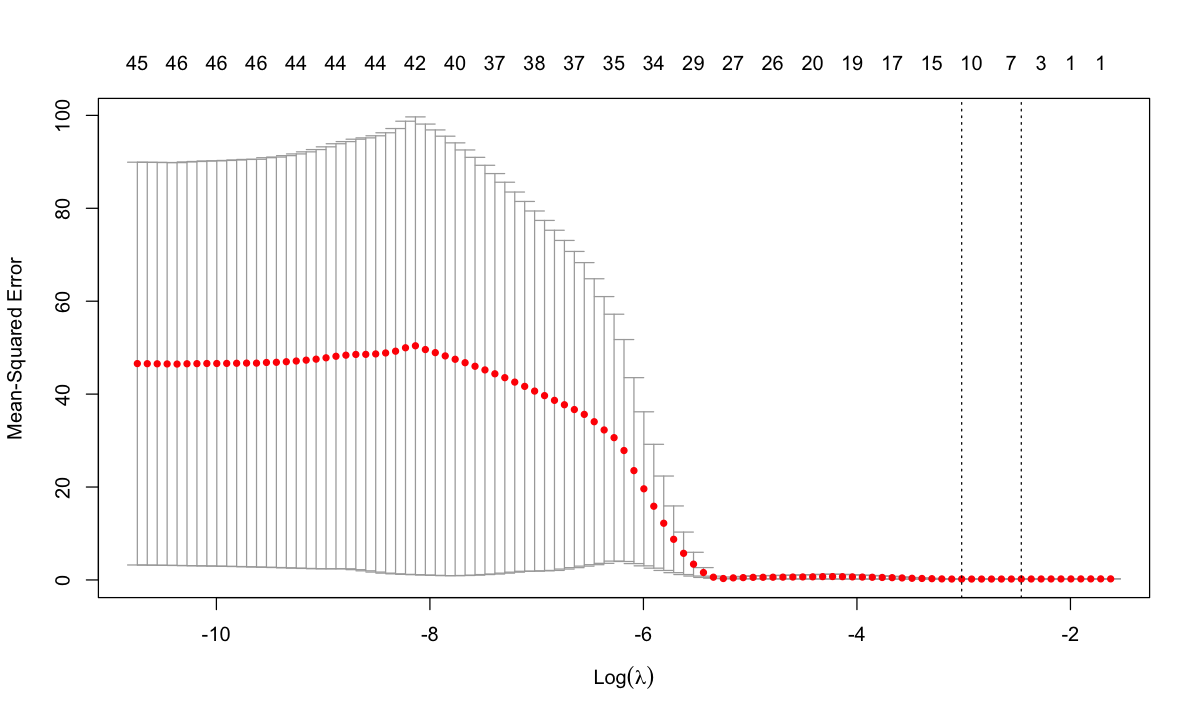

In [26]:
cv_fit <- cv.glmnet(x = predictors, y = response, alpha = 1, family = "gaussian")
par(bg = "white")
plot(cv_fit)
optimal_lambda <- cv_fit$lambda.min  # The lambda that minimizes the cross-validated error
print(optimal_lambda)
# Fit the final model with the optimal lambda
final_model <- glmnet(x = predictors, y = response, alpha = 1, lambda = optimal_lambda)
coef(final_model)


In [27]:
my.pred.stats(predict.glmnet.f(cv_fit, web_stats, type="response"), web_stats$serviceable_agg)

ERROR: Error in terms.formula(formula, data = data): argument is not a valid model


---------------------------------------------------------------------------
Performance statistics:

Confusion matrix:

    target
pred  0  1
   0 15  6
   1  7  0

Classification accuracy = 0.5357143 
Sensitivity             = 0 
Specificity             = 0.6818182 
Area-under-curve        = 0.3409091 
Logarithmic loss        = 299.3361 

---------------------------------------------------------------------------


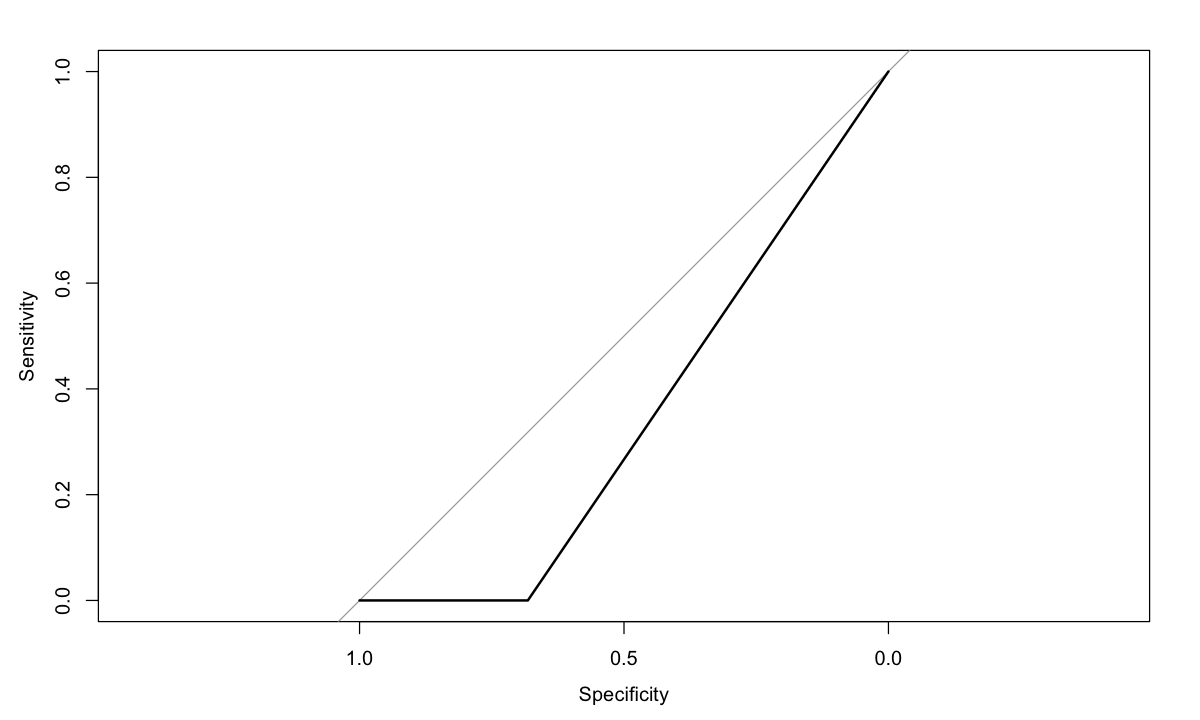

In [107]:
# Sample the training indices
train_indices <- sample(1:nrow(web_stats_copy), size = 0.7 * nrow(web_stats_copy))

# Split the data into training and testing sets
train_set <- web_stats_copy[train_indices, ]
test_set <- web_stats_copy[-train_indices, ]

# Ensure the target variable is a factor in both train and test sets
train_set$serviceable_agg <- factor(train_set$serviceable_agg, levels = c(0, 1))
test_set$serviceable_agg <- factor(test_set$serviceable_agg, levels = c(0, 1))
# Scale only the numeric columns
numeric_columns <- sapply(train_set, is.numeric)

# Scale the numeric columns in train and test sets
train_set_scaled <- train_set
train_set_scaled[, numeric_columns] <- scale(train_set[, numeric_columns])

test_set_scaled <- test_set
test_set_scaled[, numeric_columns] <- scale(test_set[, numeric_columns])
# Fit the lasso model
lasso.fit <- glmnet.f(serviceable_agg ~ ., train_set_scaled, family="binomial", lambda = 0, maxit = 1000000)

# Predict probabilities on the test set
probabilities <- predict.glmnet.f(lasso.fit, test_set_scaled, type="response")

probabilities <- as.numeric(probabilities)
# Convert probabilities to binary predictions (0 or 1)
predicted_binary <- ifelse(probabilities > 0.5, 1, 0)

par(bg = "white")
# Pass binary factors to the custom stats function
my.pred.stats(predicted_binary, actual_binary)


In [108]:
lasso.fit = glmnet.f(serviceable_agg ~ ., train_set_scaled, family="binomial")
coefficients(lasso.fit)

  [[ suppressing 100 column names 's0', 's1', 's2' ... ]]



49 x 100 sparse Matrix of class "dgCMatrix"
                                                                         
(Intercept)                                        -0.6690496 -0.67247498
IT01V_packetsRecieved_ellen                         .          .         
IT01V_packetsRecieved_aadya                         .          .         
IT01V_packetsLost_ellen                             .          .         
IT01V_packetsLost_aadya                             .          .         
IT01V_frameWidth_ellen                              .          .         
IT01V_frameWidth_aadya                              .          .         
IT01V_frameHeight_ellen                             .          .         
IT01V_frameHeight_aadya                             .          .         
IT01V_totalFreezesDuration_ellen                    .          .         
IT01V_totalFreezesDuration_aadya                    .          .         
IT01V_framesPerSecond_ellen                         .          .    

Warning message in plot.window(...):
""labels" is not a graphical parameter"
Warning message in plot.xy(xy, type, ...):
""labels" is not a graphical parameter"
Warning message in box(...):
""labels" is not a graphical parameter"
Warning message in title(...):
""labels" is not a graphical parameter"


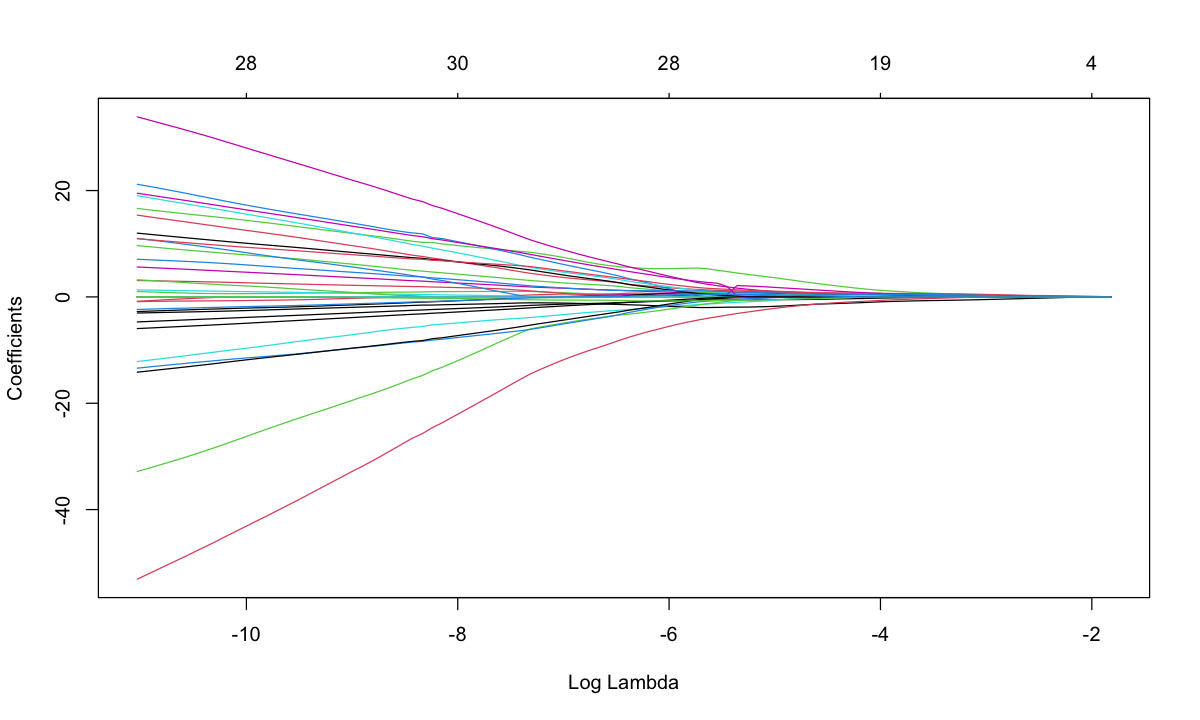

In [111]:
par(bg = "white")
plot(lasso.fit,"lambda", labels=T)

[1] 1.266222

49 x 1 sparse Matrix of class "dgCMatrix"
                                                           s1
(Intercept)                                        -0.6690496
IT01V_packetsRecieved_ellen                         .        
IT01V_packetsRecieved_aadya                         .        
IT01V_packetsLost_ellen                             .        
IT01V_packetsLost_aadya                             .        
IT01V_frameWidth_ellen                              .        
IT01V_frameWidth_aadya                              .        
IT01V_frameHeight_ellen                             .        
IT01V_frameHeight_aadya                             .        
IT01V_totalFreezesDuration_ellen                    .        
IT01V_totalFreezesDuration_aadya                    .        
IT01V_framesPerSecond_ellen                         .        
IT01V_framesPerSecond_aadya                         .        
IT01V_bytesReceived_in_bits_s_ellen                 .        
IT01V_bytesReceived_in_bits_

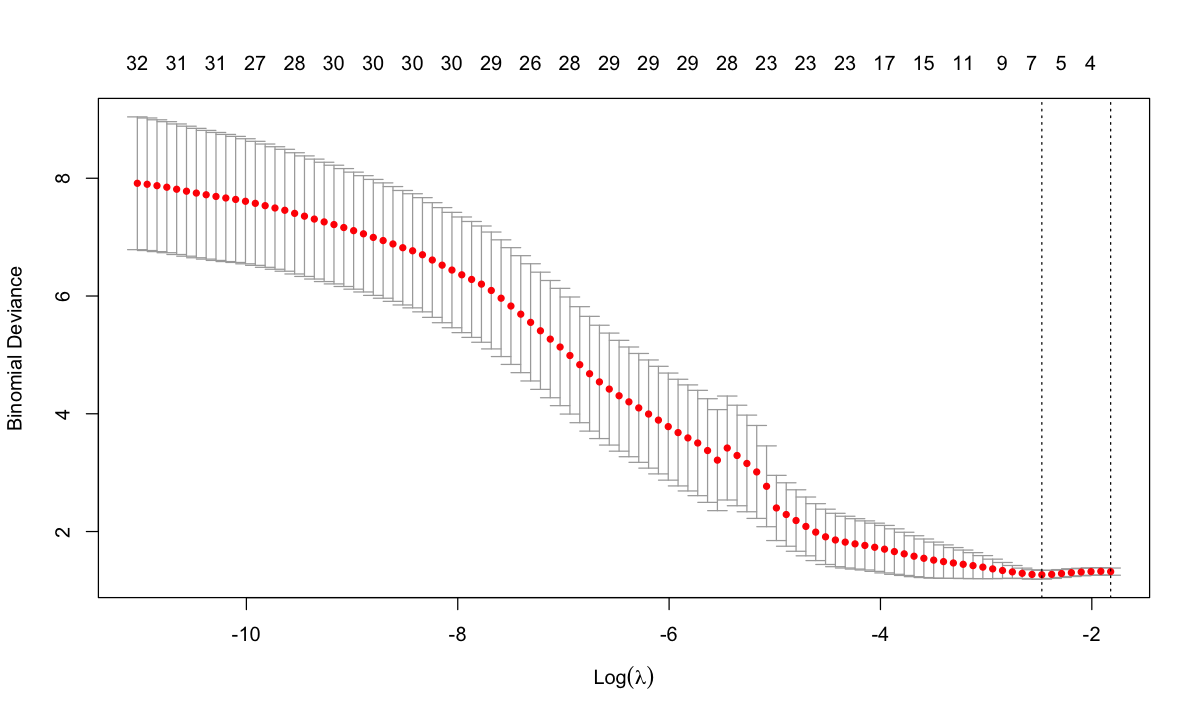

In [113]:
lasso.fit = cv.glmnet.f(serviceable_agg ~ ., train_set_scaled, family="binomial")
par(bg = "white")
plot(lasso.fit)
min(lasso.fit$cvm)
coefficients(lasso.fit)

---------------------------------------------------------------------------
Performance statistics:

Confusion matrix:

    target
pred  0  1
   0 18 10
   1  0  0

Classification accuracy = 0.6428571 
Sensitivity             = 0 
Specificity             = 1 
Area-under-curve        = 0.5 
Logarithmic loss        = 18.27024 

---------------------------------------------------------------------------


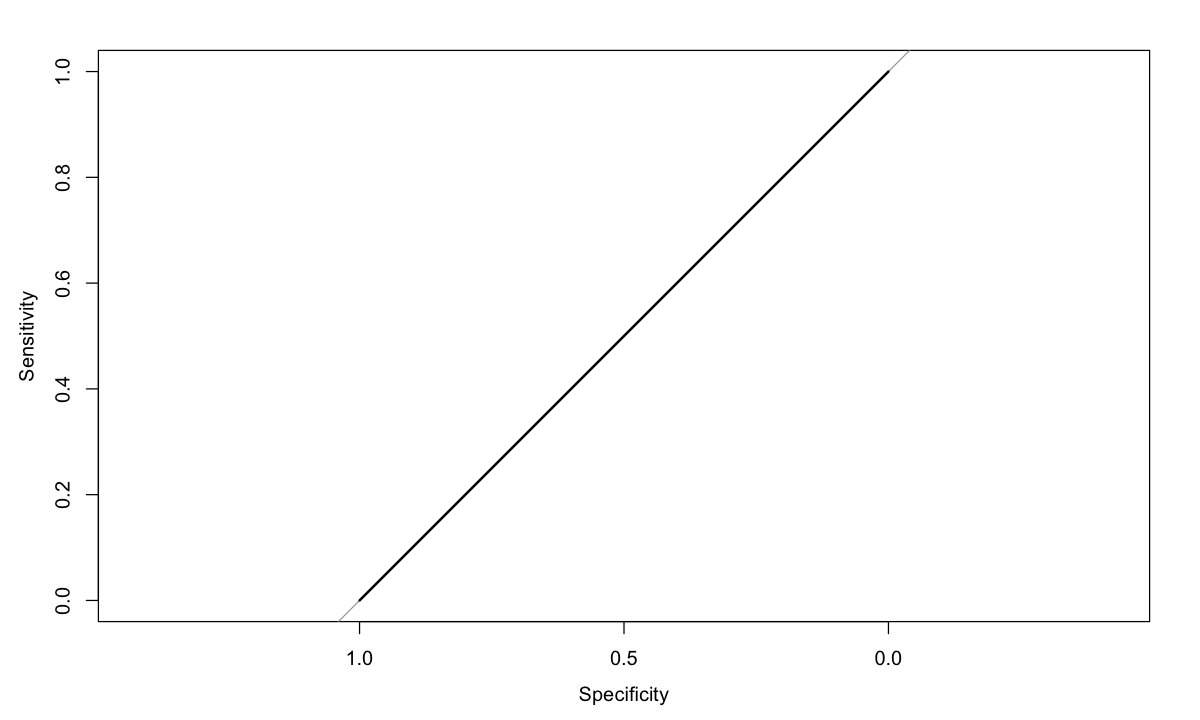

In [115]:
par(bg = "white")
my.pred.stats(predict.glmnet.f(lasso.fit, test_set_scaled, type="response"), test_set_scaled$serviceable_agg)

In [32]:
subjective <- read.csv("/Users/User/Documents/GitHub/DesktopDownthrottlingExperiment/post_experiment/Regression/regression_tables/fieldwork/subjective_table.csv")
sum(is.na(subjective))
web_stats <- read.csv("/Users/User/Documents/GitHub/DesktopDownthrottlingExperiment/post_experiment/Regression_2_(web_to_serviceable)/independent_vars_tables/fieldwork_independent_vars_table.csv")
sum(is.na(web_stats))
#rename the id col in subjective to perform a merge
names(subjective)[names(subjective) == "identifier"] <- "ID"
#add the ordinal var to web_stats
web_stats <- merge(web_stats, subjective[, c("ID", "serviceable_agg")], by = "ID", all.x = TRUE)
sum(is.na(web_stats))

[1] 0

[1] 0

[1] 90

In [9]:
# Separate the predictor variables (X) and the response variable (y)
X <- model.matrix(serviceable_agg ~ IT01V_packetsRecieved_ellen + IT01V_packetsRecieved_aadya + IT01V_packetsLost_ellen + IT01V_packetsLost_aadya + 
IT01V_frameWidth_ellen + IT01V_frameWidth_aadya + IT01V_totalFreezesDuration_ellen + IT01V_totalFreezesDuration_aadya + 
IT01V_framesPerSecond_ellen + IT01V_framesPerSecond_aadya + IT01V_bytesReceived_in_bits_s_ellen + IT01V_bytesReceived_in_bits_s_aadya + 
IT01V_totalProcessingDelay_ellen + IT01V_totalProcessingDelay_aadya + IT01V_jitter_ellen + IT01V_jitter_aadya + 
IT01V_jitterBufferDelay_emissions_ellen + IT01V_jitterBufferDelay_emissions_aadya + 
IT01A_bytesReceived_in_bits_s_ellen + IT01A_bytesReceived_in_bits_s_aadya + IT01A_jitterBufferDelay_emissions_ellen + IT01A_jitterBufferDelay_emissions_aadya + 
OT01V_packetsSent_s_ellen + OT01V_packetsSent_s_aadya + OT01V_bytesSent_in_bits_s_ellen + OT01V_bytesSent_in_bits_s_aadya + 
OT01V_frameWidth_ellen + OT01V_frameWidth_aadya + OT01V_framesPerSecond_ellen + OT01V_framesPerSecond_aadya + 
OT01V_totalPacketSendDelay_ellen + OT01V_totalPacketSendDelay_aadya + OT01V_totalPacketSendDelay_packetsSent_in_ms_ellen + 
OT01V_totalPacketSendDelay_packetsSent_in_ms_aadya + RIV_roundTripTime_ellen + RIV_roundTripTime_aadya + 
RIV_fractionLost_ellen + RIV_fractionLost_aadya + RIA_fractionLost_ellen + RIA_fractionLost_aadya + 
RIA_roundTripTime_ellen + RIA_roundTripTime_aadya + ROA_roundTripTime_ellen + ROA_roundTripTime_aadya + 
AP_totalPlayoutDelay_ellen + AP_totalPlayoutDelay_aadya, 
data = web_stats)[, -1] 

y <- as.numeric(web_stats$serviceable_agg)  # Ensure the response is numeric


[1] 90

In [8]:
install.packages("glmnet")
library(glmnet)

# Set alpha = 1 for Lasso
lasso_model <- cv.glmnet(X, y, family = "binomial", alpha = 1)

# Print the best lambda value
lasso_model$lambda.min

# Fit the model with the best lambda
best_lasso_model <- glmnet(X, y, family = "binomial", alpha = 1, lambda = lasso_model$lambda.min)




The downloaded binary packages are in
	/var/folders/91/4c3th19d31j6hvx23r6bb5b00000gn/T//RtmpyGic5f/downloaded_packages


Loading required package: Matrix

Loaded glmnet 4.1-8



ERROR: Error in glmnet(x, y, weights = weights, offset = offset, lambda = lambda, : number of observations in y (90) not equal to the number of rows of x (0)


[1] 49